In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
from scipy import stats
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis
## Part 1. Precipitation Analysis

#### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [11]:
# 1. Find the last data point in the database first
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [13]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df = df.sort_values('Date')

# Remove any rows containing NaN values
df.dropna(inplace = True)
df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0.5, 1.0, 'Rainfall By Date')

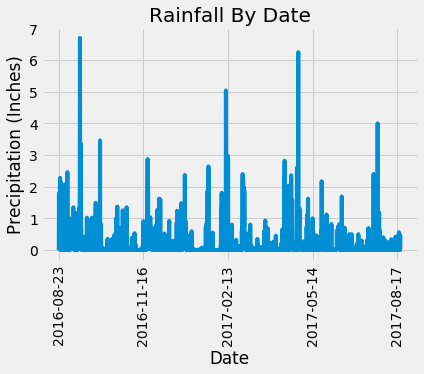

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, legend=None)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')
plt.title('Rainfall By Date')

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Part 2. Station Analysis

In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
temp_results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_ago).all()
df2 = pd.DataFrame(temp_results, columns=['TOBS'])
df2

,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, -1.340000000000014, 'Temperature')

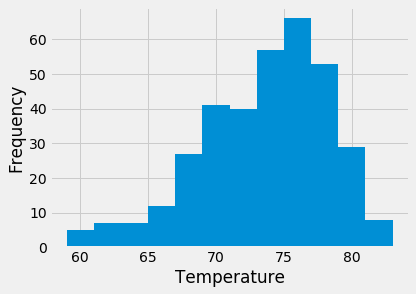

In [42]:
# Plot the results as a histogram
df2.plot.hist(bins=12, legend=None)
plt.tight_layout()
plt.xlabel("Temperature")

## Bonus Challenge Assignment

### Chosen Vacation Dates: 2015-10-14  -- 2015-10-22

### Temperature Analysis I

In [28]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.

# Read CSV file as pandas dataframe
avg_temp_df = pd.read_csv('/Users/kiranrangaraj/Desktop/Homework/sqlalchemy-challenge/Resources/hawaii_measurements.csv')
avg_temp_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [30]:
# Convert the date column to a datatime format
avg_temp_df.date = pd.to_datetime(avg_temp_df.date, infer_datetime_format=True)

# Set the index to the date
avg_temp_df.set_index(avg_temp_df['date'], inplace=True)

# Drop the extra unneeded date column
avg_temp_df = avg_temp_df.drop(columns='date')

# Display a preview of the cleaned up dataframe
avg_temp_df.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [32]:
# Filter the dataframe for just the month of June & December
june = avg_temp_df[avg_temp_df.index.month == 6]
december = avg_temp_df[avg_temp_df.index.month == 12]

In [38]:
# Identify the average temperature in June at all stations across all available years in the dataset.
june['tobs'].mean()

74.94411764705882

In [39]:
# Identify the average temperature in December at all stations across all available years in the dataset.
december['tobs'].mean()

71.04152933421226

In [41]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Store all of Junes and Decembers tobs into separate variables
june_tobs = june.tobs
december_tobs = december.tobs

# Run an Independent (Two Sample) T-Test
stats.ttest_ind(june_tobs, december_tobs)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Analysis
#### Is there any statistically significant difference in the means? Will you use a paired t-test, or an unpaired t-test? Why?
#### An independent-samples t-tests was run since we are comparing temperature observations for two different groups of cases, the months of June verses the months of December. Though the average overall temperature difference between June and December was only 3.9 degrees Fahreinheit, the independent-samples t-test found an extremely low p-value, which strongly indicates statistical significance in the difference between the mean temperatures.

In [77]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


### Temperature Analysis II


In [97]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_year_start = dt.date(2015, 10, 14) - dt.timedelta(days=365)
prev_year_end = dt.date(2015, 10, 22) - dt.timedelta(days=365)

# Run 'calc_temps' function for stated date parameters
tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

69.0 77.49253731343283 83.0


/Users/kiranrangaraj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


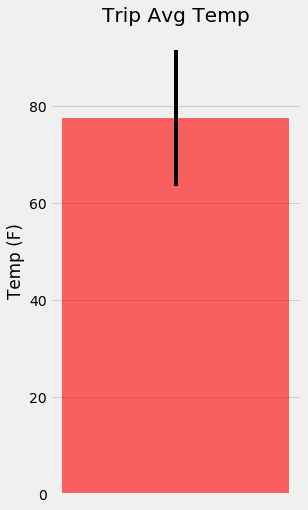

In [125]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2))
x_value = 1
y_error = tmax-tmin

bar = ax.bar(x_value, tavg, yerr=y_error, alpha=0.6, color='red')
ax.set(xticks=range(x_value), title="Trip Avg Temp", ylabel="Temp (F)")
fig.show()

### Daily Rainfall Average

In [104]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(func.sum(Measurement.prcp), Station.station, Station.name, 
              Station.latitude, Station.longitude, Station.elevation).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= prev_year_start).\
    filter(Measurement.date <= prev_year_end).\
    group_by(Station.name).\
    order_by(func.sum(Measurement.prcp).desc()).all()

[(8.69,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (6.54,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (5.8,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (4.71,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4.26, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (4.17,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (2.2199999999999998,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (0.06, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [112]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# function usage example
daily_normals("10-14")

[(67.0, 75.1923076923077, 82.0)]

In [113]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2015-10-14'
end_date = '2015-10-22'

# Use the start and end date to create a range of dates
trip_date_ranges = pd.date_range(start_date, end_date)

# Strip off the year and save a list of %m-%d strings
trip_days = trip_date_ranges.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_days:
    normals.append(*daily_normals(date))
    
normals

[(67.0, 75.1923076923077, 82.0),
 (67.0, 75.63461538461539, 82.0),
 (67.0, 75.59183673469387, 81.0),
 (65.0, 75.07843137254902, 83.0),
 (65.0, 75.0, 83.0),
 (65.0, 73.24489795918367, 81.0),
 (67.0, 74.79629629629629, 82.0),
 (66.0, 74.96078431372548, 82.0),
 (66.0, 74.84313725490196, 81.0)]

In [122]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df['date'] = trip_date_ranges
df.set_index(['date'], inplace=True)
df

,tmin,tavg,tmax
date,,,
2015-10-14,67.0,75.192308,82.0
2015-10-15,67.0,75.634615,82.0
2015-10-16,67.0,75.591837,81.0
2015-10-17,65.0,75.078431,83.0
2015-10-18,65.0,75.000000,83.0
2015-10-19,65.0,73.244898,81.0
2015-10-20,67.0,74.796296,82.0
2015-10-21,66.0,74.960784,82.0
2015-10-22,66.0,74.843137,81.0


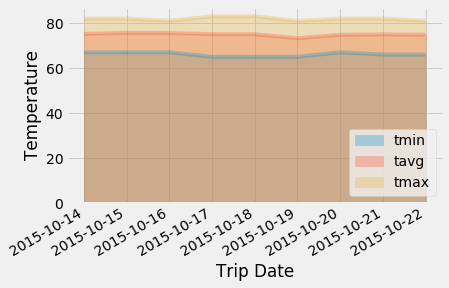

In [137]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=False, x_compat=True, alpha=0.3)
plt.xlabel('Trip Date')
plt.ylabel('Temperature')
plt.legend(loc='lower right')